<a href="https://colab.research.google.com/github/amejiyo/FRA503_Rescource/blob/main/logistic_regrssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**
---

###**Aim**

  To predict GarageCars number from the given data


###**Methodology**

  To create the prediction model, the data prepocessing is firstly performed. In this report, the data preprocessing of this model is divied into 4 main parts: 1.transforming categorical value into numerical value, 2. removing outliers and missing value, 3.performing features selection, and 4.spliting data into 2 group, training and testing. The criteria of selecting features is based on chi-squared test. After data was cleaned and filtered already, we analyse the result of data preprocessing to observe and understand the insight. Then, we created the prediction model, linear and logistic regression. To evaluate each model performance, we observe and analyse through classification report and confusion matrix.





In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import math
df = pd.read_csv("https://raw.githubusercontent.com/BawornsakS/Machine-Learning-Lesson/master/Preprocessing%20%26%20Linear%20Regression%20Lab.csv",low_memory=False)
df = df.iloc[:,1:] #remove given index
df.head()
df.GarageCars.value_counts()
#Goal to predict GarageCars number

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [ ]:
#change categorical data to numerical data
# df = pd.get_dummies(df)

# temp = df.pop('GarageCars')
for i in range(0,1127):
  if df.GarageCars[i] == 0 and ~math.isnan(float(df.Fence[i])):
    print(df.iloc[[i]])
# #delete missing value + reset index
# df = df.dropna(axis=0,how='any').reset_index().reindex(df.columns, axis=1)
# df
# # df.GarageCars.value_counts()

   Foundation  1stFlrSF KitchenQual  ...  LotFrontage Fence  SalePrice
39      PConc      1152          Fa  ...         65.0   NaN      82000

[1 rows x 21 columns]
   Foundation  1stFlrSF KitchenQual  ...  LotFrontage Fence  SalePrice
48     BrkTil       736          TA  ...         33.0   NaN     113000

[1 rows x 21 columns]
   Foundation  1stFlrSF KitchenQual  ...  LotFrontage Fence  SalePrice
78     CBlock      1768          TA  ...         72.0   NaN     136500

[1 rows x 21 columns]


ValueError: ignored

In [ ]:
#Remove the outliers 
#Outliers are data which lies below quantile 0.01 and lies upper quntile 0.99
for i in df.columns:
  for x in [i]:
  
      min = df[i].quantile(0.01) #find the quantile 0.01 value
      max = df[i].quantile(0.99) #find the quantile 0.99 value
  
      df.loc[df[x] < min,x] = np.nan #replace it to nan
      df.loc[df[x] > max,x] = np.nan

#delete missing value + reset index
df = df.dropna(axis=0,how='any').reset_index().reindex(df.columns, axis=1)
df.shape

(980, 47)

In [ ]:
df.describe()

,1stFlrSF,Fireplaces,FullBath,OpenPorchSF,GarageYrBlt,OverallQual,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,SalePrice,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.0,980.0,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.0,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.0,980.000000,980.000000,980.00000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.0
mean,1162.409184,0.586735,1.590816,43.624490,1980.125510,6.202041,1974.817347,501.179592,6.480612,1.874490,1495.324490,1986.093878,69.550000,182099.364286,0.095918,0.404082,0.486735,0.013265,0.0,0.0,0.063265,0.016327,0.437755,0.482653,0.553061,0.026531,0.154082,0.0,0.266327,0.089796,0.023469,0.444898,0.419388,0.029592,0.0,0.371429,0.598980,0.14898,0.094898,0.289796,0.048980,0.092857,0.302041,0.041837,0.036735,0.107143,0.0
std,336.697515,0.604400,0.516250,55.171566,24.440743,1.291125,28.796498,172.369672,1.391141,0.617718,422.384733,20.868315,19.965306,67791.983387,0.294630,0.490964,0.500079,0.114467,0.0,0.0,0.243564,0.126793,0.496364,0.499954,0.497430,0.160789,0.361211,0.0,0.442263,0.286035,0.151466,0.497208,0.493711,0.169545,0.0,0.483433,0.490355,0.35625,0.293224,0.453899,0.215936,0.290380,0.459377,0.200318,0.188206,0.309453,0.0
min,520.000000,0.000000,1.000000,0.000000,1916.000000,3.000000,1900.000000,186.000000,4.000000,1.000000,747.000000,1950.000000,21.000000,73000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,901.000000,0.000000,1.000000,0.000000,1962.000000,5.000000,1955.000000,384.000000,6.000000,1.000000,1182.500000,1967.000000,60.000000,133375.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1112.000000,1.000000,2.000000,28.000000,1985.500000,6.000000,1977.000000,484.000000,6.000000,2.000000,1467.000000,1996.000000,70.000000,166500.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1389.250000,1.000000,2.000000,66.000000,2003.000000,7.000000,2003.000000,588.000000,7.000000,2.000000,1725.250000,2005.000000,80.000000,213625.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,2158.000000,2.000000,3.000000,263.000000,2009.000000,10.000000,2009.000000,995.000000,11.000000,3.000000,2978.000000,2009.000000,140.000000,446261.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,

The result of data preprocessing is increasing the number of features to 47 and reduce the number of information to 980. After the eliminating outliers process ,the range of data becomes smaller, such as the range of GarageCars is decreaseing to 1-3 from 0-4.

In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
temp = df

#split goal from input data
y = df.pop('GarageCars')
x = df
df = temp


selector = SelectKBest(chi2, k=3)     #This line creates the selector, k = number of remaining features
x_new = selector.fit(x,y)             #This line fits the selector to the dataset, and select the features.

# Once we fit the selector, all features are selected and its indices are saved. We can create a new dataframe with those indices.
col = selector.get_support(indices=True)   #all indices are saved in col.
x_new = x.iloc[:,col]
x_new.shape

(980, 3)

In [ ]:
y.value_counts()

2.0    591
1.0    256
3.0    133
Name: GarageCars, dtype: int64

In [ ]:
#observe the new df
df_new = x_new
df_new['GarageCars'] = y
df_new.describe()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GarageArea,GrLivArea,SalePrice,GarageCars
count,980.000000,980.000000,980.000000,980.000000
mean,501.179592,1495.324490,182099.364286,1.874490
std,172.369672,422.384733,67791.983387,0.617718
min,186.000000,747.000000,73000.000000,1.000000
25%,384.000000,1182.500000,133375.000000,1.000000
50%,484.000000,1467.000000,166500.000000,2.000000
75%,588.000000,1725.250000,213625.000000,2.000000
max,995.000000,2978.000000,446261.000000,3.000000


In [ ]:
cols = df_new.columns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
group1 = df_new[df_new['GarageCars']==1]
group2 = df_new[df_new['GarageCars']==2]
group3 = df_new[df_new['GarageCars']==3]
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
ax.set_zlabel(cols[2])
# plt.axis('equal')
ax.scatter3D(group1[cols[0]],group1[cols[1]],group1[cols[2]],marker='v',c='g',label='GarageCars = 1')
ax.scatter3D(group2[cols[0]],group2[cols[1]],group2[cols[2]],marker='o',c='b',label='GarageCars = 2')
ax.scatter3D(group3[cols[0]],group3[cols[1]],group3[cols[2]],marker='x',c='r',label='GarageCars = 3')
ax.legend(loc='upper right')
fig.set_size_inches(18.5, 10.5)

After the feature selection, attributes of the data are reduced into 3: GarageArea, GrLiveArea, and SalePrice. These 3 attribute are the most top 3 significant features which cause the great impact on number of GarageCars. 


The most of GarageCars has value equals to 2, following with 1 and 3, respectively.

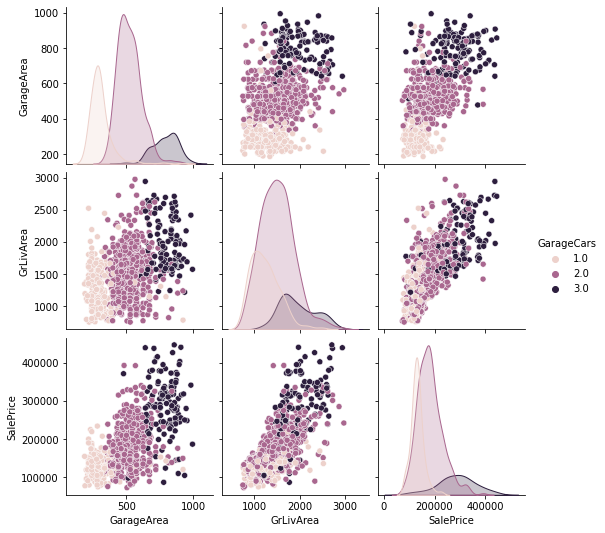

In [ ]:
#to see the relationship between features and goal
import seaborn as sns
sns.pairplot(df_new, hue='GarageCars') 

From graphs (pairplot and 3d plot), they present the same trend: increasing of attributes value results in increasing the number of GarageCars. From plots, when attributes have the low value, GarageCar trends to be 1. When the value of attributes is shifted forward the GarageCar value is increase to 2 and 3, respectively.

In [ ]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels as sm

x_val = df_new[[cols[0],cols[1],cols[2]]].values
y_val = y.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_val)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_val,test_size = 0.3,random_state = 0)
# print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)


X_train shape (686, 3)
y_train shape (686,)
X_test shape (294, 3)
y_test shape (294,)


In [ ]:
#Build linear regression model
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)
#Predict on training set
y_pred_train = model_logistic.predict(x_train)
#Predict on testing set
y_pred_test = model_logistic.predict(x_test)
# = theta0 + theta1*x _theta2*y
print("Theta0: ",model_logistic.intercept_[0])
print("Theta1: ",model_logistic.coef_[0][0])
print("Theta2: ",model_logistic.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[0],model_logistic.coef_[0][0],model_logistic.coef_[0][1]))

Theta0:  4.23300052172414
Theta1:  -7.916597689309555
Theta2:  -1.5242929773135512
0 = 4.2330+-7.9166x+-1.5243y


In [ ]:
#plot results
df_training = pd.DataFrame({cols[0]:x_train[:,0],cols[1]:x_train[:,1],cols[2]:x_train[:,2],'Label':y_train})
df_testing = pd.DataFrame({cols[0]:x_test[:,0],cols[1]:x_test[:,1],cols[2]:x_test[:,2],'Label':y_test})



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred_train))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))

Classification report 
              precision    recall  f1-score   support

         1.0       0.95      0.84      0.89       175
         2.0       0.90      0.98      0.94       416
         3.0       0.97      0.80      0.88        95

    accuracy                           0.92       686
   macro avg       0.94      0.87      0.90       686
weighted avg       0.92      0.92      0.92       686

Confusion matrix 
[[147  28   0]
 [  7 407   2]
 [  0  19  76]]


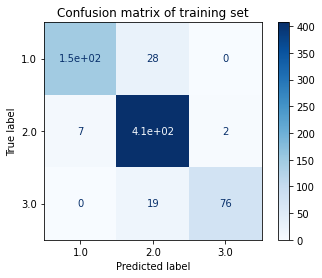

In [ ]:
# Plot confusion matrix of training set
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

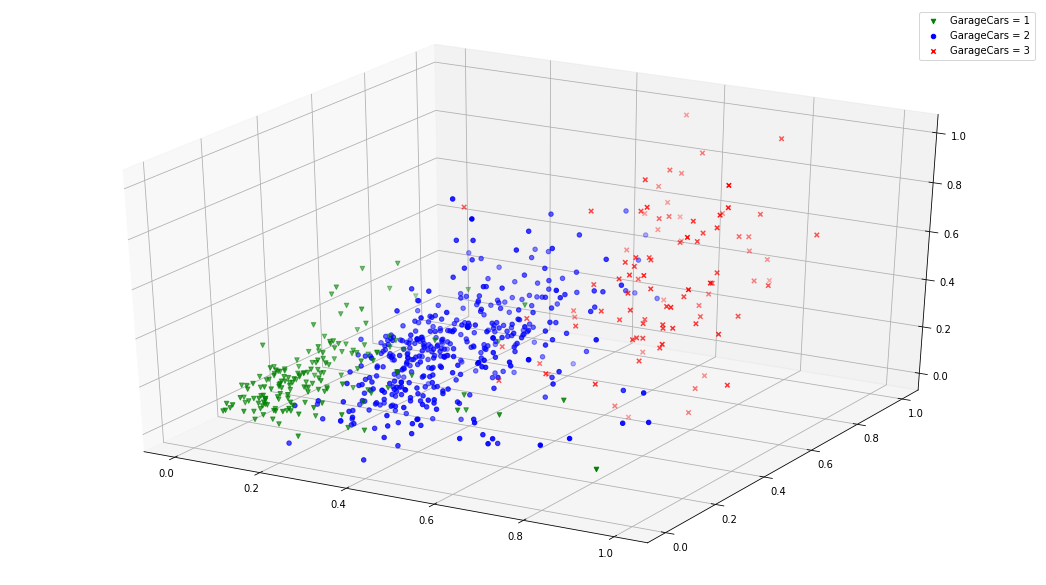

In [ ]:
cols = df_new.columns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
group0 = df_training[df_training['Label']==1]
group1 = df_training[df_training['Label']==2]
group2 = df_training[df_training['Label']==3]
# group0_test = df_testing[df_testing['Label']==0]
# group1_test = df_testing[df_testing['Label']==1]
# group2_test = df_testing[df_testing['Label']==2]
# ax.set_xlabel(cols[0])
# ax.set_ylabel(cols[1])
# ax.set_zlabel(cols[2])
# plt.axis('equal')
ax.scatter3D(group0[cols[0]],group0[cols[1]],group0[cols[2]],marker='v',c='g',label='GarageCars = 1')
ax.scatter3D(group1[cols[0]],group1[cols[1]],group1[cols[2]],marker='o',c='b',label='GarageCars = 2')
ax.scatter3D(group2[cols[0]],group2[cols[1]],group2[cols[2]],marker='x',c='r',label='GarageCars = 3')
ax.legend(loc='upper right')
fig.set_size_inches(18.5, 10.5)